# Neural network Classification of 46 different classes

The Reuters dataset allows us to classify data(short newswires) into 46 topics. As each data point can be classified only into one category, we are facing  a single-label, multiclass classification problem.

Let's load the data :

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)



Using TensorFlow backend.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

As in our previous Neural Network implementation, each row of data is a list of integers

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)



In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]



## We then train the model

In [7]:
history  = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 105us/step - loss: 2.5948 - accuracy: 0.5264 - val_loss: 1.7217 - val_accuracy: 0.6210
Epoch 2/20
7982/7982 [==============================] - 1s 81us/step - loss: 1.4209 - accuracy: 0.6976 - val_loss: 1.3208 - val_accuracy: 0.7080
Epoch 3/20
7982/7982 [==============================] - 1s 80us/step - loss: 1.0682 - accuracy: 0.7710 - val_loss: 1.1464 - val_accuracy: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.8423 - accuracy: 0.8227 - val_loss: 1.0519 - val_accuracy: 0.7770
Epoch 5/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.6763 - accuracy: 0.8566 - val_loss: 0.9902 - val_accuracy: 0.7940
Epoch 6/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.5384 - accuracy: 0.8850 - val_loss: 0.9387 - val_accuracy: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 85us/step - loss: 0.43

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

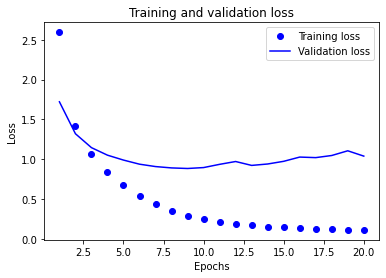

In [9]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

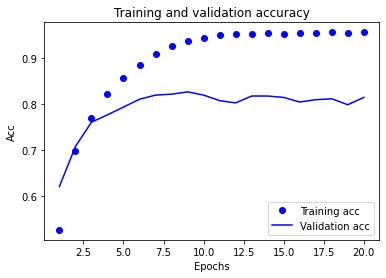

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

The networks begins to overfit after nine epochs

## Retraining a model from scratch

In [11]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size=512, validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 88us/step - loss: 2.5322 - accuracy: 0.5546 - val_loss: 1.7354 - val_accuracy: 0.6350
Epoch 2/9
7982/7982 [==============================] - 1s 70us/step - loss: 1.3830 - accuracy: 0.7022 - val_loss: 1.3180 - val_accuracy: 0.6870
Epoch 3/9
7982/7982 [==============================] - 1s 67us/step - loss: 1.0234 - accuracy: 0.7764 - val_loss: 1.1309 - val_accuracy: 0.7620
Epoch 4/9
7982/7982 [==============================] - 1s 68us/step - loss: 0.8077 - accuracy: 0.8275 - val_loss: 1.0570 - val_accuracy: 0.7660
Epoch 5/9
7982/7982 [==============================] - 1s 70us/step - loss: 0.6430 - accuracy: 0.8629 - val_loss: 0.9852 - val_accuracy: 0.7880
Epoch 6/9
7982/7982 [==============================] - 1s 65us/step - loss: 0.5192 - accuracy: 0.8899 - val_loss: 0.9436 - val_accuracy: 0.8040
Epoch 7/9
7982/7982 [==============================] - 1s 68us/step - loss: 0.4175 - acc

In [12]:
results

[0.9972302616438692, 0.784060537815094]

We are able to reach an accuracy of nearly 80%. This result is pretty good compared to a random baseline.

## Generating predictions

In [13]:
predictions = model.predict(x_test)

In [14]:
sum_list = []
for i in range(10):
     sum_list.append(np.sum(predictions[i]))
        
sum_list

[1.0, 1.0, 0.99999994, 1.0000001, 1.0, 0.9999998, 1.0000002, 1.0, 1.0, 1.0]

In [15]:
highest_pred = []
prob = []

for i in range(10):
    highest_pred.append((np.argmax(predictions[i]), max(predictions[i])))
    
print(highest_pred)


[(3, 0.8730744), (10, 0.439615), (1, 0.4519302), (4, 0.8910846), (13, 0.9727945), (3, 0.9813343), (3, 0.86574256), (3, 0.99717605), (3, 0.9991792), (3, 0.97474104)]


### Model with an information bottleneck

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=512, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 75us/step - loss: 3.4409 - accuracy: 0.0486 - val_loss: 3.1294 - val_accuracy: 0.1980
Epoch 2/20
7982/7982 [==============================] - 1s 69us/step - loss: 2.8975 - accuracy: 0.2189 - val_loss: 2.7207 - val_accuracy: 0.2340
Epoch 3/20
7982/7982 [==============================] - 1s 70us/step - loss: 2.4926 - accuracy: 0.3359 - val_loss: 2.3805 - val_accuracy: 0.5170
Epoch 4/20
7982/7982 [==============================] - 1s 68us/step - loss: 2.1412 - accuracy: 0.5383 - val_loss: 2.0885 - val_accuracy: 0.5730
Epoch 5/20
7982/7982 [==============================] - 1s 67us/step - loss: 1.8441 - accuracy: 0.5792 - val_loss: 1.8693 - val_accuracy: 0.5800
Epoch 6/20
7982/7982 [==============================] - 1s 64us/step - loss: 1.6310 - accuracy: 0.5942 - val_loss: 1.7543 - val_accuracy: 0.5850
Epoch 7/20
7982/7982 [==============================] - 1s 68us/step - loss: 1.490

We are now able to reach a validation accuracy of 67%, which is a significant drop. Information bottleneck is something to avoid when trying to classify between a large number of classes.

## Retraining networks with different sizes of hidden layers

### 2 hidden layers network

model with 16 and 16 units layers
2246/2246 [==============================] - 0s 57us/step


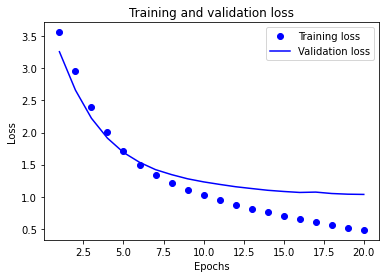

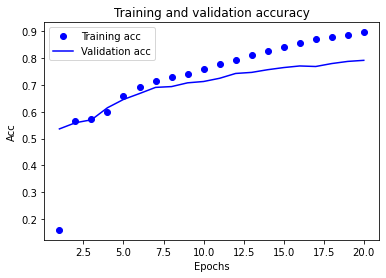

[1.1276768183771881, 0.7582368850708008]
model with 16 and 64 units layers
2246/2246 [==============================] - 0s 61us/step


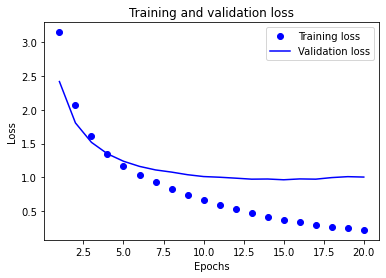

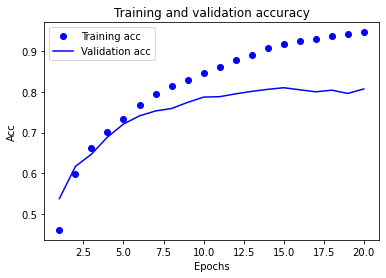

[1.110478616673715, 0.7773820161819458]
model with 16 and 144 units layers
2246/2246 [==============================] - 0s 73us/step


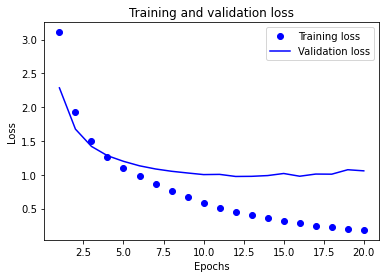

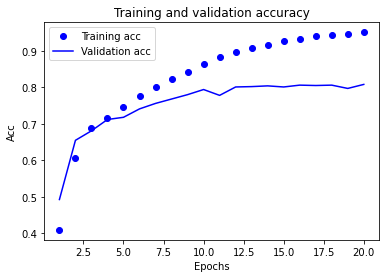

[1.1485262680350938, 0.7769367694854736]
model with 16 and 256 units layers
2246/2246 [==============================] - 0s 70us/step


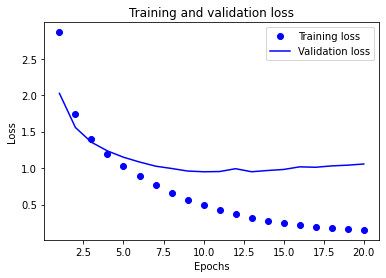

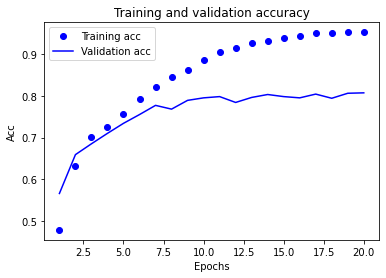

[1.228940546777985, 0.7738201022148132]
model with 64 and 16 units layers
2246/2246 [==============================] - 0s 76us/step


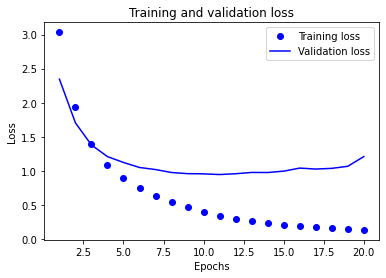

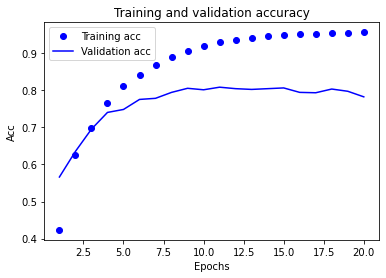

[1.3470227945519682, 0.7484416961669922]
model with 64 and 64 units layers
2246/2246 [==============================] - 0s 82us/step


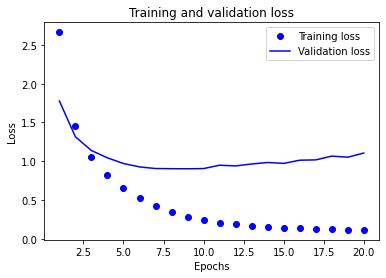

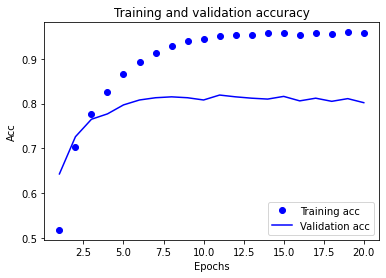

[1.295221572249252, 0.7738201022148132]
model with 64 and 144 units layers
2246/2246 [==============================] - 0s 85us/step


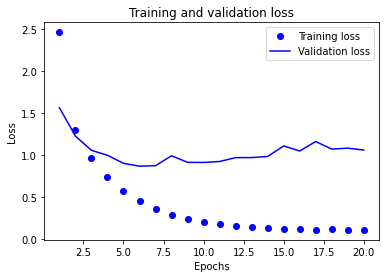

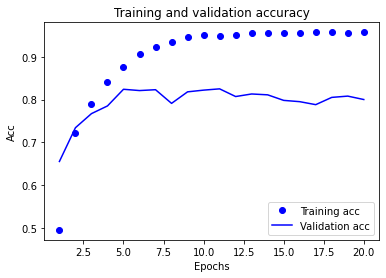

[1.2193617519266564, 0.7894033789634705]
model with 64 and 256 units layers
2246/2246 [==============================] - 0s 83us/step


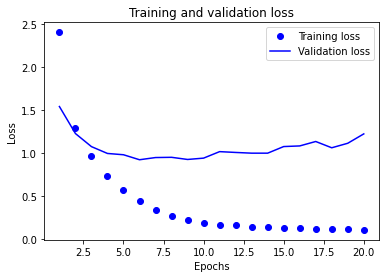

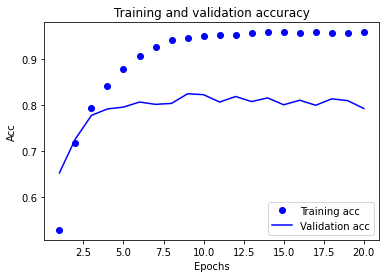

[1.3801745287775462, 0.7715939283370972]
model with 144 and 16 units layers
2246/2246 [==============================] - 0s 94us/step


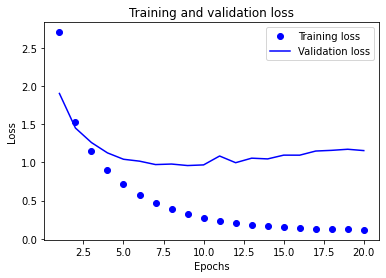

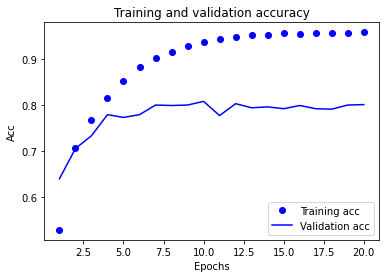

[1.299853117680401, 0.777827262878418]
model with 144 and 64 units layers
2246/2246 [==============================] - 0s 95us/step


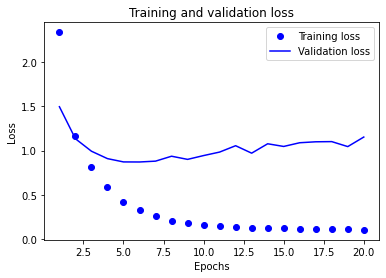

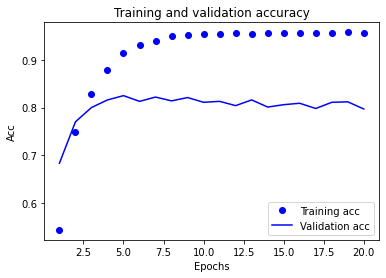

[1.3314558030873245, 0.7845057845115662]
model with 144 and 144 units layers
2246/2246 [==============================] - 0s 97us/step


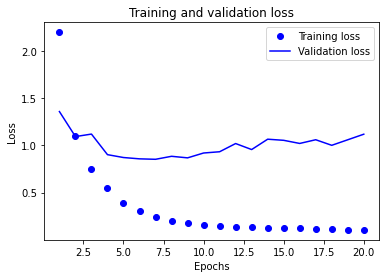

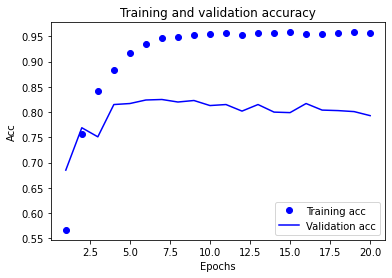

[1.314921191411685, 0.7822796106338501]
model with 144 and 256 units layers
2246/2246 [==============================] - 0s 97us/step


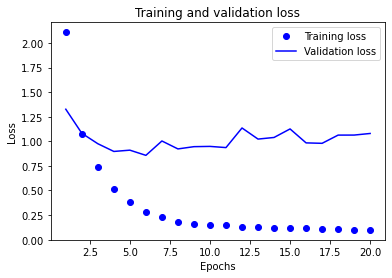

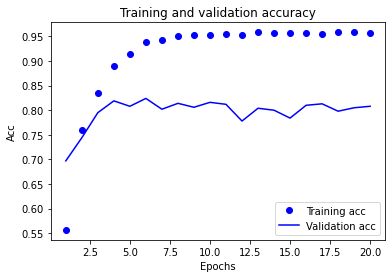

[1.3112978356710419, 0.7813891172409058]
model with 256 and 16 units layers
2246/2246 [==============================] - 0s 146us/step


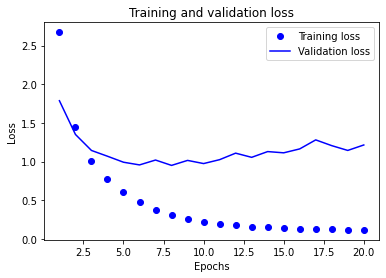

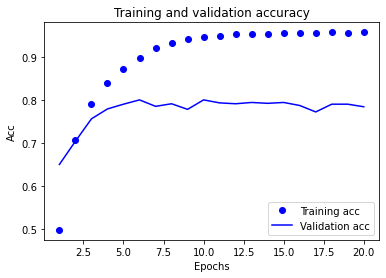

[1.5033909410424033, 0.7658059000968933]
model with 256 and 64 units layers
2246/2246 [==============================] - 0s 144us/step


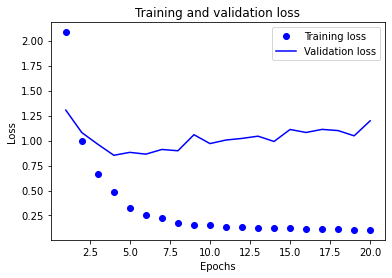

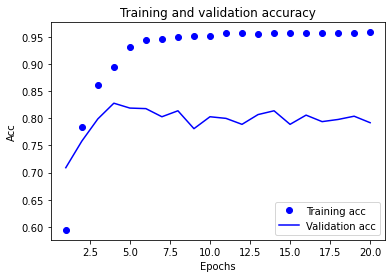

[1.3721772548033526, 0.7751558423042297]
model with 256 and 144 units layers
2246/2246 [==============================] - 0s 149us/step


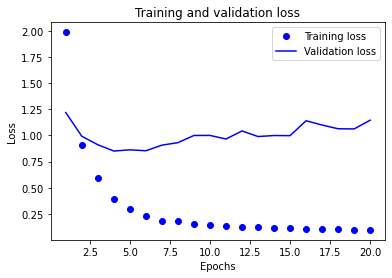

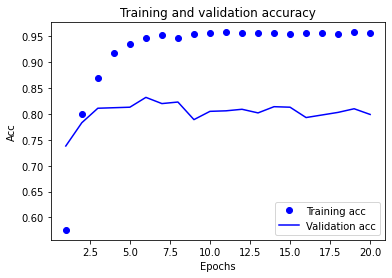

[1.355812533243575, 0.7827248573303223]
model with 256 and 256 units layers
2246/2246 [==============================] - 0s 160us/step


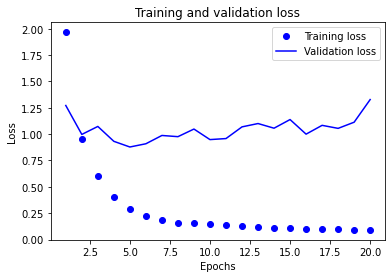

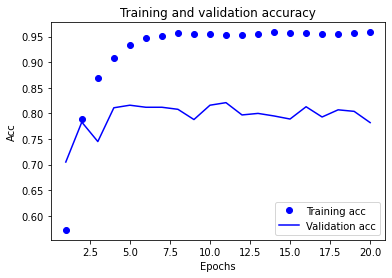

[1.5667648353644599, 0.7573463916778564]


In [17]:
all_results = []

for i in range(4):
    for j in range(4):
        print("model with {} and {} units layers".format(16*(i+1)**2, 16*(j+1)**2))
        model = models.Sequential()
        model.add(layers.Dense(16*((i+1)**2), activation = 'relu', input_shape = (10000, )))
        model.add(layers.Dense((16*((j+1)**2)), activation = 'relu'))
        model.add(layers.Dense(46, activation = 'softmax'))
        
        model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
        
        history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=512, validation_data = (x_val, y_val), verbose = False)
        
        results = model.evaluate(x_test, one_hot_test_labels)
        
        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs = range(1, len(loss) + 1)

        plt.plot(epochs, loss, 'bo', label = 'Training loss')
        plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
        plt.title('Training and validation loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()
        
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']

        plt.plot(epochs, acc, 'bo', label = 'Training acc')
        plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
        plt.title('Training and validation accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Acc')
        plt.legend()

        plt.show()
        print(results)
        results.append(16*(i+1)**2)
        results.append(16*(j+1)**2)
        
        all_results.append(results)
        

In [20]:
for i in range(16):
     print("first layer {} units, second layer {} units\n loss : {}, accuracy : {}\n".format(all_results[i][2], all_results[i][3], all_results[i][0], all_results[i][1]))

first layer 16 units, second layer 16 units
 loss : 1.1276768183771881, accuracy : 0.7582368850708008

first layer 16 units, second layer 64 units
 loss : 1.110478616673715, accuracy : 0.7773820161819458

first layer 16 units, second layer 144 units
 loss : 1.1485262680350938, accuracy : 0.7769367694854736

first layer 16 units, second layer 256 units
 loss : 1.228940546777985, accuracy : 0.7738201022148132

first layer 64 units, second layer 16 units
 loss : 1.3470227945519682, accuracy : 0.7484416961669922

first layer 64 units, second layer 64 units
 loss : 1.295221572249252, accuracy : 0.7738201022148132

first layer 64 units, second layer 144 units
 loss : 1.2193617519266564, accuracy : 0.7894033789634705

first layer 64 units, second layer 256 units
 loss : 1.3801745287775462, accuracy : 0.7715939283370972

first layer 144 units, second layer 16 units
 loss : 1.299853117680401, accuracy : 0.777827262878418

first layer 144 units, second layer 64 units
 loss : 1.3314558030873245, 

We can see that our best accuracy is achieved on 20 epochs for the model with 64 units on first layer and 144 units on second layer. The result is not significantly better than the results we had earlier but still we can try to retrin the model from scratch on 10 epochs to see where it can get

In [21]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(144, activation='relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs = 10, batch_size=512, validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 108us/step - loss: 2.4282 - accuracy: 0.5368 - val_loss: 1.5762 - val_accuracy: 0.6570
Epoch 2/10
7982/7982 [==============================] - 1s 84us/step - loss: 1.2964 - accuracy: 0.7167 - val_loss: 1.2212 - val_accuracy: 0.7320
Epoch 3/10
7982/7982 [==============================] - 1s 85us/step - loss: 0.9668 - accuracy: 0.7897 - val_loss: 1.0748 - val_accuracy: 0.7620
Epoch 4/10
7982/7982 [==============================] - 1s 80us/step - loss: 0.7458 - accuracy: 0.8423 - val_loss: 1.0135 - val_accuracy: 0.7800
Epoch 5/10
7982/7982 [==============================] - 1s 82us/step - loss: 0.5785 - accuracy: 0.8799 - val_loss: 0.9427 - val_accuracy: 0.8020
Epoch 6/10
7982/7982 [==============================] - 1s 75us/step - loss: 0.4527 - accuracy: 0.9029 - val_loss: 0.9012 - val_accuracy: 0.8110
Epoch 7/10
7982/7982 [==============================] - 1s 74us/step - loss: 0.35

In [22]:
results

[1.0197268148033298, 0.7885128855705261]

So the best accuracy we can get on this dataset is 78.8% accuracy